In [ ]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev -DCMAKE_BUILD_TYPE=Release ..
!cmake --build {build_path}
os.chdir(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

import numpy as np
from tqdm.notebook import tqdm
import random
import matplotlib.pyplot as plt

In [2]:
def learn(hidden, it = 100000, max_step = 50):
    print(f"hidden = {int(hidden)}")
    model = pypumila.Pumila9.make_shared(int(hidden))
    reward = []
    score = []
    # ih = []
    with tqdm(total=it) as pbar:
        while pbar.n < it:
            sim = pypumila.GameSim()
            rnd_p = random.random()
            # print(rnd_p)
            for e in range(max_step):
                sim.step()
                pbar.update()
                field = sim.field_copy()
                reward.append(pypumila.Pumila9.calc_reward(field))
                a = model.get_action_rnd(field, rnd_p)
                model.learn_step(field)
                # diff = model.mean_diff
                sim.put(pypumila.actions[a])
                while not sim.is_free_phase():
                    sim.step()
            score.append(sim.field_copy().total_score)
            # ih.append(model.main.get_matrix_ih())
    model.save_file(f"pumila9_{hidden}")
    return [model, reward, score]

In [3]:
model, reward, score = learn(300, 10000, 100)

hidden = 300


  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
# hidden = [int(h) for h in np.geomspace(100, 10000, 5)]
# models = []
# rewards = []
# scores = []
# for i in range(len(hidden)):
#     model, reward, score = learn(hidden[i])
#     models.append(model)
#     rewards.append(reward)
#     scores.append(score)

hidden = 100


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 316


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 1000


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 3162


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 10000


  0%|          | 0/100000 [00:00<?, ?it/s]

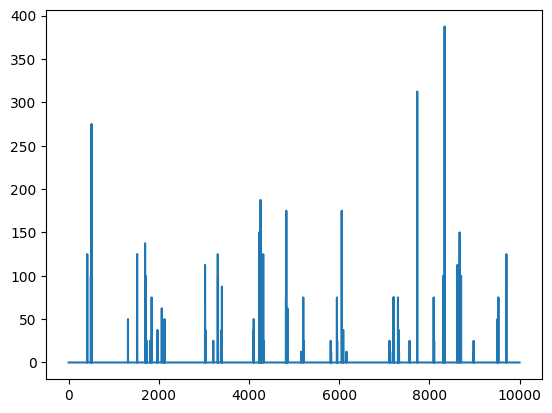

In [4]:
# plt.plot(np.array(rewards).T, label=hidden)
plt.plot(reward)

In [7]:
# ar = np.array(rewards)
# plt.plot(
#     np.array([[np.average(ar[j, i:i+100]) for i in range(len(rewards[j])-100)] for j in range(len(rewards))]).T,
#     label=hidden
# )
# plt.legend()

In [8]:
# ar = np.array(rewards)
# plt.plot(
#     np.array([[np.average(ar[j, i:i+1000]) for i in range(len(rewards[j])-1000)] for j in range(len(rewards))]).T,
#     label=hidden
# )
# plt.legend()

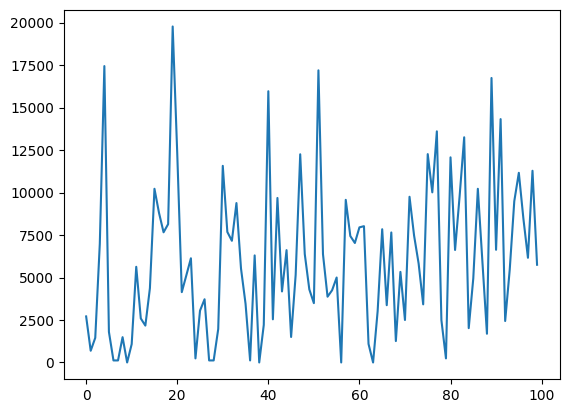

In [9]:
# plt.plot(np.array(scores).T, label=hidden)
# plt.legend()
plt.plot(score)

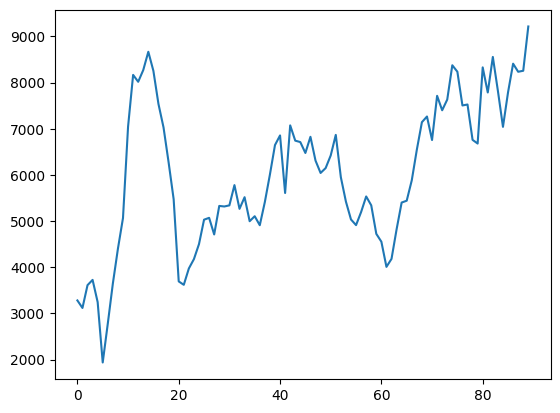

In [14]:
# ar = np.array(scores)
# plt.plot(
#     np.array([[np.average(ar[j, i:i+100]) for i in range(len(scores[j])-100)] for j in range(len(scores))]).T,
#     label=hidden
# )
# plt.legend()
ar = np.array(score)
plt.plot([np.average(ar[i:i+10]) for i in range(len(ar)-10)])

In [10]:
sim = pypumila.GameSim()
win = pypumila.Window(sim)
# model = pypumila.Pumila9.make_shared(1)
# model.load_file("pumila9_300")
model = pypumila.Pumila8s.make_shared(1)
model.load_file("pumila8s_316")

In [ ]:
prev_r = [0, 0, 0]
while True:
    while not sim.is_free_phase():
        win.step(True)
    f = sim.field_copy()
    r = [f.prev_chain_num, f.prev_puyo_num, pypumila.Pumila9.calc_reward(sim.field_copy())]
    if prev_r != r:
        prev_r = r
        print(r)
    a = model.get_action(sim)
    print(model.get_action_coeff(f))
    sim.soft_put(pypumila.actions[a])
    while sim.is_free_phase():
        win.step(True)

In [9]:
win.quit()